# Predicting Solar Panel Adoption - Important Features
#### UC Berkeley MIDS
`Team: Gabriel Hudson, Noah Levy, Laura Williams`

This notebook takes a closer look at some of the variables that our models indicated were the most important features contributing to the model.

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# load curated dataset used to create models
deepsolar = pd.read_csv('../Datasets/deepsolar_LW1.csv', index_col=0)

In [5]:
print("Dataset rows and dimensions:", deepsolar.shape)

Dataset rows and dimensions: (71305, 108)


In [6]:
deepsolar.head()

,average_household_income,county,gini_index,land_area,per_capita_income,population_density,state,total_area,water_area,education_less_than_high_school_rate,...,number_of_solar_system_per_household,incentive_count_residential,incentive_residential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,70352.789869,Stearns County,0.3490,147.73120,26999.0,44.52005,mn,154.37190,6.640769,0.073879,...,0.000000,34,11,34,0,0,25,12,0,9.46
1,61727.085202,Stearns County,0.4074,16.61679,20951.0,482.64430,mn,16.69968,0.082887,0.062836,...,0.006726,34,11,34,0,0,25,12,0,9.46
2,71496.886583,Stearns County,0.3926,37.44482,28021.0,186.16730,mn,39.33050,1.885683,0.064509,...,0.001112,34,11,34,0,0,25,12,0,9.46
3,86840.152755,Stearns County,0.3949,75.21147,29275.0,84.13610,mn,81.04071,5.829235,0.066840,...,0.000000,34,11,34,0,0,25,12,0,9.46
4,89135.315597,Stearns County,0.4463,44.00151,32770.0,119.63230,mn,44.60017,0.598656,0.048686,...,0.002087,34,11,34,0,0,25,12,0,9.46


### age_more_than_85_rate
This variable was returned by the random forest model as one of the most important features contributing to the model.  However, it's intuitively more likely that some other confounding variable contributes to this variable's apparent importance, not that a census tract having a high rate of population of 85 is a genuine predictor of solar panel adoption.

There are dramatically fewer census tracts with `age_more_than_85_rate` above 5% than there are other age range rates.

In [7]:
print(deepsolar[deepsolar['age_more_than_85_rate'] > .05].shape[0])
print(deepsolar[deepsolar['age_75_84_rate'] > 0.05].shape[0])
print(deepsolar[deepsolar['age_65_74_rate'] > 0.05].shape[0])
print(deepsolar[deepsolar['age_45_54_rate'] > 0.05].shape[0])
print(deepsolar[deepsolar['age_35_44_rate'] > 0.05].shape[0])
print(deepsolar[deepsolar['age_25_34_rate'] > 0.05].shape[0])
print(deepsolar[deepsolar['age_18_24_rate'] > 0.05].shape[0])

3993
25413
58270
70353
70230
69234
63623


Histograms confirm negative skew. Other age variables also have this negative skew, but `age_more_than_85_rate` also has an irregularity at the positive end of the histogram.

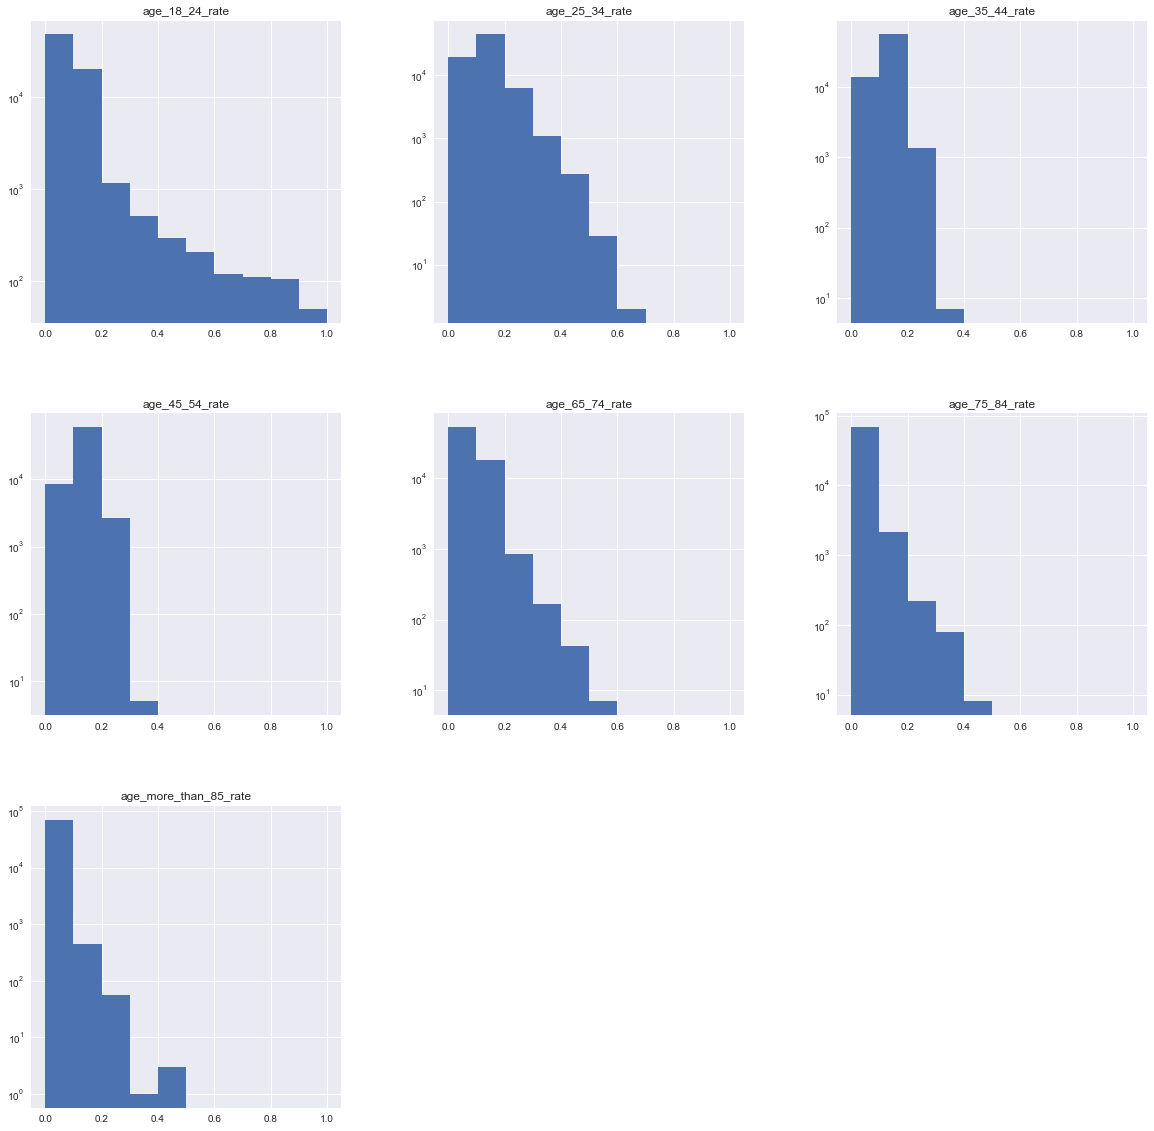

In [18]:
# histograms - using log to better see structure
age_variables = ['age_more_than_85_rate', 'age_75_84_rate', 'age_65_74_rate', 'age_45_54_rate', 
                 'age_35_44_rate', 'age_25_34_rate', 'age_18_24_rate']
deepsolar[age_variables].hist(figsize=(20,20), log=True, range=(0,1))
plt.show()

This variable is not highly correlated with any other variable.

In [9]:
deepsolar.corr().loc['age_more_than_85_rate'].sort_values(ascending=False)

age_more_than_85_rate                      1.000000
age_75_84_rate                             0.626207
age_median                                 0.517923
age_65_74_rate                             0.403273
health_insurance_public_rate               0.223245
age_55_64_rate                             0.212372
race_white_rate                            0.178661
travel_time_less_than_10_rate              0.173140
gini_index                                 0.151230
per_capita_income                          0.150160
occupation_education_rate                  0.116836
number_of_years_of_education               0.116609
education_professional_school_rate         0.114575
occupation_finance_rate                    0.109584
transportation_home_rate                   0.097627
sales_tax                                  0.095616
occupancy_vacant_rate                      0.091875
employ_rate                                0.087333
education_master_rate                      0.079683
lon         